# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3




In [4]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btcresponse= requests.get(btc_url).json()
btcresponse["data"]["1"]["quotes"]["USD"]["price"]
ethresposne = requests.get(eth_url).json()
ethresposne["data"]["1027"]["quotes"]["USD"]["price"]

366.53

In [6]:
# Fetch current BTC price

btc_price = float(btcresponse["data"]["1"]["quotes"]["USD"]["price"])

# Fetch current ETH price
eth_price = float(ethresposne["data"]["1027"]["quotes"]["USD"]["price"])
# Compute current value of my crpto
my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13587.72
The current value of your 5.3 ETH is $1942.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
shares_data = {
    "shares":[1.2, 5.3]
}

tickers =["BTC", "ETC"]
#btc = 1.2
#eth = 5.3
#spy = 50
#agg = 200
df_shares =pd.DataFrame(shares_data, index=tickers)

df_shares

shares
BTC     1.2
ETC     5.3

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET")


# Create the Alpaca API object
alpaca = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version="v2")

In [9]:
# Format current date as ISO format
today =pd.Timestamp("2020-10-13", tz="America/New_York").isoformat


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio =alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
#alpaca.get_barset(["AGG","SPY"],"1D").df

# Preview DataFrame
df_portfolio

AGG                                         \
                             open      high       low    close    volume   
2020-05-28 00:00:00-04:00  117.14  117.3500  112.2400  117.330  18488400   
2020-05-29 00:00:00-04:00  117.43  117.7100  117.3200  117.670  16292692   
2020-06-01 00:00:00-04:00  117.35  117.3999  117.2400  117.365  10635820   
2020-06-02 00:00:00-04:00  117.38  117.4700  117.3100  117.450   7837090   
2020-06-03 00:00:00-04:00  117.26  117.4100  117.0600  117.160  11554888   
...                           ...       ...       ...      ...       ...   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.930   2770157   
2020-10-13 00:00:00-04:00  118.00  118.0600  117.9294  118.010   3101197   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.040   3292758   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.9600  117.970   4977703   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.8800  117.880   3591541   

                              SPY                                         
                             open      high     low     close     volume  
2020-05-28 00:00:00-04:00  304.65  306.8400  302.24  302.9600  159401239  
2020-05-29 00:00:00-04:00  302.46  304.9600  299.47  304.1600  200312312  
2020-06-01 00:00:00-04:00  303.62  306.2050  303.06  305.5800   92628393  
2020-06-02 00:00:00-04:00  306.55  308.1300  305.10  308.1300  131833888  
2020-06-03 00:00:00-04:00  310.24  313.2200  309.94  312.2117  157657617  
...                           ...       ...     ...       ...        ...  
2020-10-12 00:00:00-04:00  349.59  354.0200  349.06  352.4300   61163344  
2020-10-13 00:00:00-04:00  352.16  352.4651  349.09  350.1500   61479085  
2020-10-14 00:00:00-04:00  350.75  351.9300  347.14  347.9700   47156216  
2020-10-15 00:00:00-04:00  343.71  348.0200  343.13  347.5100   50609035  
2020-10-16 00:00:00-04:00  348.96  350.7500  347.10  347.2500   62796942  

[100 rows x 10 columns]

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]


agg_close_price= df_closing_prices["AGG"][-1]
spy_close_price= df_closing_prices["SPY"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [11]:
# Compute the current value of shares
my_agg = 200
my_spy=50

my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

data=[my_spy_value+my_agg_value, my_btc_value+ my_eth_value]

# Create savings DataFrame
df_savings=pd.DataFrame(data,columns=["amount"] ,index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

amount
crypto  40938.500
shares  15530.329

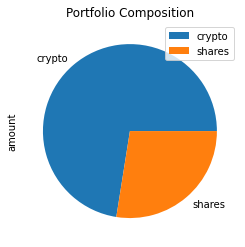

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
ttl_savings=df_savings["amount"].sum()

# Validate saving health
if ttl_savings > emergency_fund: 
    print("Congratulating the person for having enough money in this   fund")
elif ttl_savings == emergency_fund:
    print("congratulating the person on reaching this financial goal")
elif  ttl_savings < emergency_fund:
    print("yopui are this short this much"+ emergency_fund-ttl_savings)   

Congratulating the person for having enough money in this   fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]


df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_ticker.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_sims = 1000
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [18]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [130]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001581  1.002917  0.993962  0.994707  0.991622  1.002771  0.994312   
2     0.998453  1.005432  0.993095  0.990021  0.990716  1.004410  0.995417   
3     0.991825  1.005739  0.988896  0.991092  0.990935  1.001733  0.999250   
4     0.990197  0.998230  0.988595  0.993033  0.987103  0.994035  1.003643   
...        ...       ...       ...       ...       ...       ...       ...   
7556  4.435767  4.775548  5.706466  1.019760  9.514175  5.945057  4.158915   
7557  4.436757  4.810491  5.672263  1.007515  9.471879  5.921304  4.163162   
7558  4.423267  4.789350  5.690628  1.002432  9.506431  5.909909  4.158321   
7559  4.429827  4.753677  5.720847  0.997967  9.585608  5.850361  4.187533   
7560  4.475217  4.765341  5.678935  0.990358  9.515063  5.823246  4.171502   

             7         8          9   ...        90        91        92  \
0      1.000000  1.000000   1.000000  ...  1.000000  1.000000  1.000000   
1      0.999791  0.997639   0.989565  ...  1.008743  1.004275  1.013675   
2      0.999926  0.992423   0.989976  ...  1.005435  1.001343  1.009959   
3      1.011733  0.994169   1.003996  ...  1.007813  1.003831  1.007465   
4      1.012277  0.988982   1.006976  ...  1.010202  1.011547  1.010881   
...         ...       ...        ...  ...       ...       ...       ...   
7556  14.512286  1.741841  14.089706  ...  4.226167  7.874614  4.097032   
7557  14.527481  1.753653  14.129555  ...  4.246837  7.888370  4.082298   
7558  14.408454  1.744602  14.088579  ...  4.235786  7.941777  4.054015   
7559  14.327209  1.759344  14.032858  ...  4.230184  8.032285  4.093381   
7560  14.344626  1.766666  13.985313  ...  4.262821  7.964079  4.105151   

            93        94         95        96        97        98         99  
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   1.000000  
1     0.989837  0.987334   0.989069  1.002191  1.000010  0.992917   1.002902  
2     0.993491  0.985730   0.982653  1.004756  0.997181  0.991158   0.995076  
3     0.994818  0.980981   0.992802  1.011261  0.993802  0.987711   0.990706  
4     0.993555  0.964725   0.991507  1.018455  0.985932  0.989358   1.002013  
...        ...       ...        ...       ...       ...       ...        ...  
7556  5.032201  6.672671  12.341127  8.040445  8.051540  4.922921  15.640348  
7557  5.009575  6.674186  12.291478  8.094130  8.043511  4.907137  15.654248  
7558  4.988416  6.768987  12.262684  8.090663  8.016854  4.925948  15.699896  
7559  4.983922  6.744504  12.261501  8.067293  7.989417  4.949791  15.763554  
7560  4.929257  6.776175  12.118886  8.046454  8.011523  4.960792  15.704130  

[7561 rows x 100 columns]

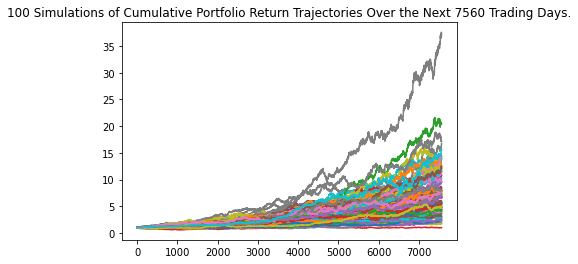

In [131]:
# Plot simulation outcomes
MC_even_dist.plot_simulation()

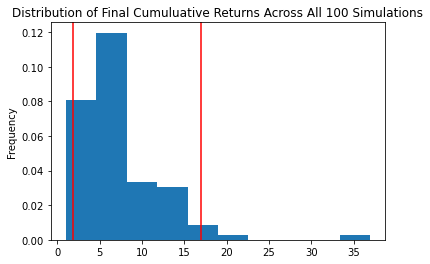

In [132]:
# Plot probability distribution and confidence intervals
MC_even_dist.plot_distribution()

### Retirement Analysis

In [133]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_even_dist.summarize_cumulative_return()
# Print summary statistics
stat=MC_even_dist.summarize_cumulative_return()
print (stat)

count           100.000000
mean              7.398798
std               4.906222
min               0.990358
25%               4.284319
50%               6.644821
75%               8.752266
max              36.931720
95% CI Lower      1.789333
95% CI Upper     16.972378
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [134]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_tbl = MC_even_dist.summarize_cumulative_return()

ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $35786.66 and $339447.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [135]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $53679.98 and $509171.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [136]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 1000
MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [137]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


0         1         2         3         4         5         6  \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001486  0.999622  1.001634  0.997527  0.999006  0.998421  1.001887   
2     1.010257  1.001236  0.993129  1.002218  1.003169  1.003048  1.009956   
3     1.011922  0.991697  0.993720  0.998659  0.986412  1.019577  1.018263   
4     1.018773  0.977964  0.994020  0.997824  0.986410  1.023584  1.009577   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.029655  1.220333  0.811204  1.234509  1.530618  1.890082  1.123636   
1257  1.030818  1.225804  0.804889  1.242312  1.533921  1.890741  1.121861   
1258  1.037028  1.226936  0.807794  1.219974  1.537702  1.910136  1.125210   
1259  1.041693  1.230003  0.803239  1.214436  1.541199  1.914760  1.135287   
1260  1.044013  1.215190  0.807657  1.223546  1.540565  1.908453  1.135573   

             7         8         9  
0     1.000000  1.000000  1.000000  
1     0.993998  1.004325  1.003855  
2     0.989331  1.005288  0.999607  
3     0.985085  1.000068  0.990672  
4     0.984319  1.003146  1.003209  
...        ...       ...       ...  
1256  1.675053  1.550182  1.879290  
1257  1.674271  1.538504  1.878816  
1258  1.684169  1.549212  1.882398  
1259  1.709061  1.549397  1.898949  
1260  1.695980  1.547139  1.899140  

[1261 rows x 10 columns]

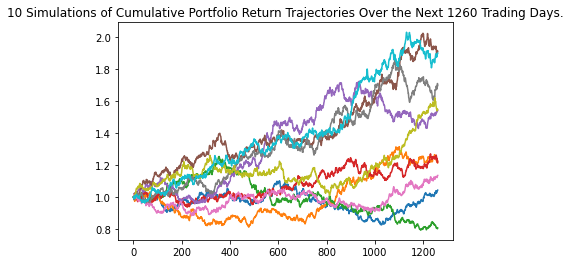

In [138]:
# Plot simulation outcomes
dist_line_plot = MC_dist.plot_simulation()

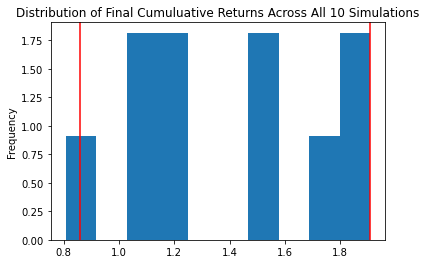

In [139]:
# Plot probability distribution and confidence intervals
dist_line_plot = MC_dist.plot_distribution()

In [140]:
# Fetch summary statistics from the Monte Carlo simulation results
dist_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(dist_tbl)

count           10.000000
mean             1.401726
std              0.372597
min              0.807657
25%              1.155477
50%              1.382056
75%              1.658770
max              1.908453
95% CI Lower     0.860837
95% CI Upper     1.906357
Name: 1260, dtype: float64


In [141]:
# Set initial investment
new_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*30000,2)
ci_upper_five = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${new_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $53679.98 and $509171.34


### Ten Years Retirement Option

In [142]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 10
MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [143]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


0         1         2         3         4         5         6  \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.016653  0.991752  1.001885  1.018079  0.987899  1.000103  0.992183   
2     1.021086  0.991181  1.007417  1.027889  0.984317  0.994395  0.995224   
3     1.024470  0.990839  1.012304  1.033961  0.984879  0.996673  0.997600   
4     1.025266  0.989698  1.018332  1.027907  0.989065  0.988991  0.996549   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.013840  2.010593  3.408650  1.914825  1.787034  1.935227  2.193531   
2517  2.030511  2.016301  3.426998  1.922137  1.782841  1.958401  2.198968   
2518  2.043816  2.021936  3.431987  1.921828  1.778992  1.964827  2.183363   
2519  2.054406  2.041639  3.397959  1.933851  1.789323  1.945599  2.166619   
2520  2.040309  2.023337  3.379343  1.937816  1.774464  1.927004  2.173424   

             7         8         9  
0     1.000000  1.000000  1.000000  
1     1.002663  0.998371  0.994120  
2     1.002116  0.998682  0.984849  
3     1.003839  1.014273  0.984089  
4     1.001151  1.013485  0.977042  
...        ...       ...       ...  
2516  1.636907  2.477339  1.139012  
2517  1.628712  2.469700  1.133294  
2518  1.635104  2.491372  1.127955  
2519  1.641225  2.502958  1.127486  
2520  1.639479  2.490436  1.120062  

[2521 rows x 10 columns]

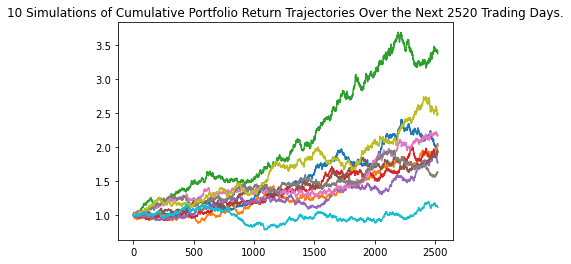

In [144]:
# Plot simulation outcomes
dist_line_plot = MC_dist.plot_simulation()

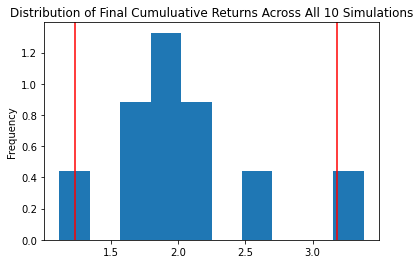

In [145]:
# Plot probability distribution and confidence intervals
dist_line_plot = MC_dist.plot_distribution()

In [146]:
# Fetch summary statistics from the Monte Carlo simulation results
dist_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(dist_tbl)

count           10.000000
mean             2.050568
std              0.588229
min              1.120062
25%              1.812599
50%              1.980576
75%              2.140146
max              3.379343
95% CI Lower     1.236931
95% CI Upper     3.179339
Name: 2520, dtype: float64


In [148]:
# Set initial investment
init_inv= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*60000,2)
ci_upper_ten = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_inv} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $107359.97 and $1018342.69
